Task-3 Movie Rating Prediction

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

import warnings
warnings.filterwarnings('ignore')

In [22]:
movie=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='Latin1')
movie.columns =['MovieIDs','MovieName','Category']
movie.dropna(inplace=True)
movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [23]:
rating = pd.read_csv("ratings.csv",sep='::', engine='python')
rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.dropna(inplace=True)
rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [25]:
users = pd.read_csv("users.csv",sep='::', engine='python')
users.columns =['UserID','Gender','Age','Occupation','Zip-code']
users.dropna(inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
users['Gender']=labelencoder.fit_transform(users['Gender'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [36]:
data = pd.concat([movie, rating,users], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117


In [27]:
data.shape

(1000208, 12)

In [37]:
data.isnull().sum()

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [38]:
data=data.dropna()
data.shape

(3882, 12)

In [39]:
dups=data.duplicated()
print(dups.any())
print(data[dups])

False
Empty DataFrame
Columns: [MovieIDs, MovieName, Category, ID, MovieID, Ratings, TimeStamp, UserID, Gender, Age, Occupation, Zip-code]
Index: []


In [41]:
data=data.drop(['TimeStamp', 'Zip-code'], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age,Occupation
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0,16.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0,15.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0,7.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0,20.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0,9.0


<Axes: xlabel='Gender', ylabel='count'>

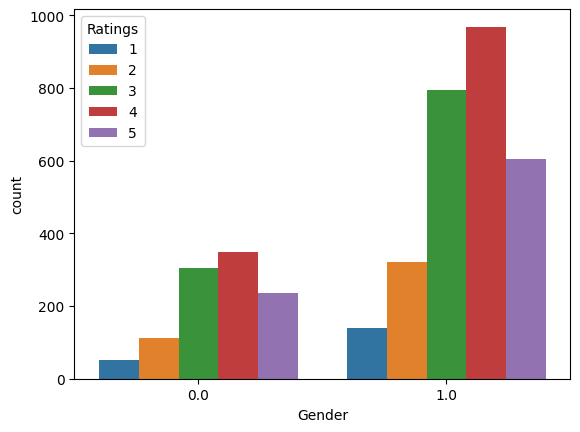

In [42]:
sns.countplot(x=data['Gender'], hue=data['Ratings'])

Text(0.5, 0, 'Ratings')

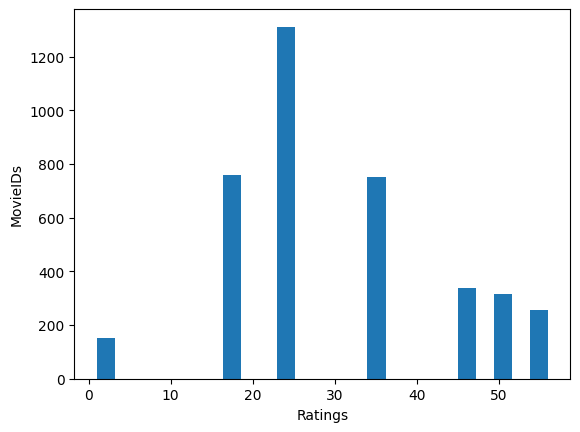

In [44]:
data.Age.plot.hist(bins=25)
plt.ylabel('MovieIDs')
plt.xlabel('Ratings')

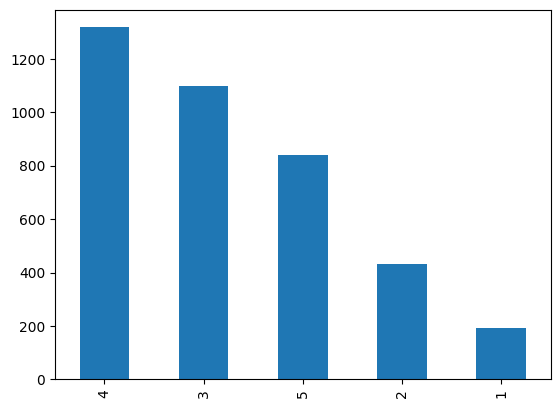

In [45]:
data['Ratings'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

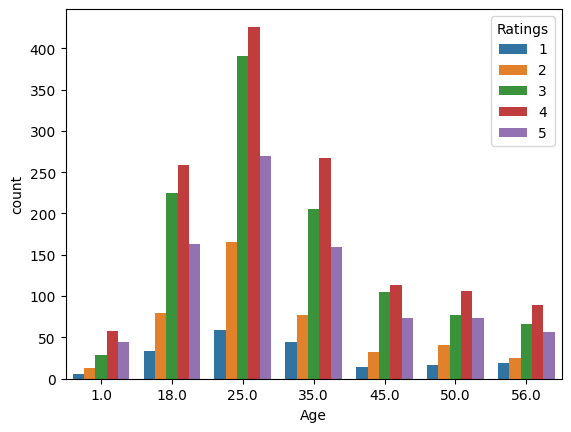

In [48]:
sns.countplot(x=data['Age'], hue=data['Ratings'])


In [49]:
X=data[['MovieID','Age','Occupation']].values
y=data[['Ratings']].values

In [52]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.33,random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.04